In [1]:
using Pkg,Plots
Pkg.activate("..")
using OpenSAFT

 Activating environment at `~/Documents/University/UROP/SAFT codes/OpenSAFT/Project.toml`


In this notebook we will try to replicate various figures from S. Dufal _et al._ 's 2015 paper

## Figure 14

In [2]:
# Setting up the model
water      = system(["water"],"SAFTVRMie");

In [3]:
# Get critical point
(T_c_water, p_c_water, v_c_water)                = get_crit_pure(water);

In [10]:
# Get saturation properties for all species
T_water   = range(280, T_c_water*0.99, length = 70)

A         = get_sat_pure.(water,T_water)
v_l_water = append!([A[i][2] for i in 1:length(T_water)],v_c_water)
v_v_water = append!([A[i][3] for i in 1:length(T_water)],v_c_water)
P_sat_water = append!([A[i][1] for i in 1:length(T_water)],p_c_water)
T_water   = append!(collect(T_water),T_c_water);

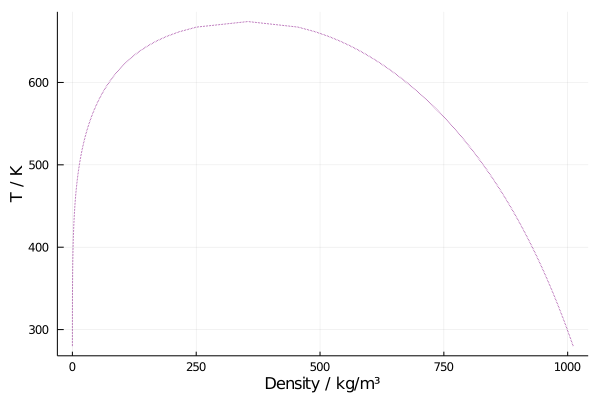

In [11]:
plt = plot(0.018 ./v_l_water, T_water,color=:purple,linestyle=:dot,xlabel="Density / kg/m³",ylabel="T / K", label = "")
plt = plot!(0.018 ./v_v_water, T_water,color=:purple,linestyle=:dot, label = "")
display(plt)

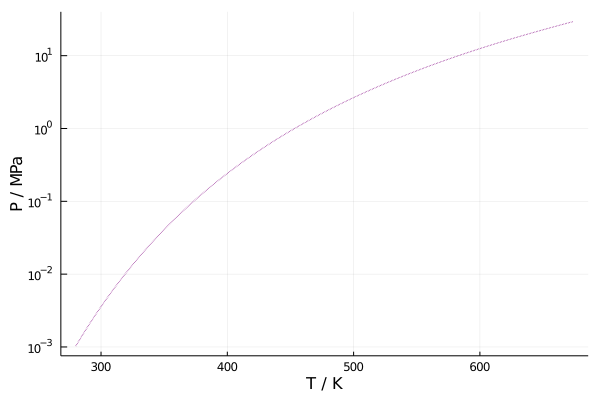

In [12]:
plt = plot(T_water, P_sat_water/1e6,color=:purple,linestyle=:dot,yaxis=:log,xlabel="T / K",ylabel="P / MPa", label = "")
display(plt)

In [13]:
h_vap_water   = get_enthalpy_vap.(water,T_water);

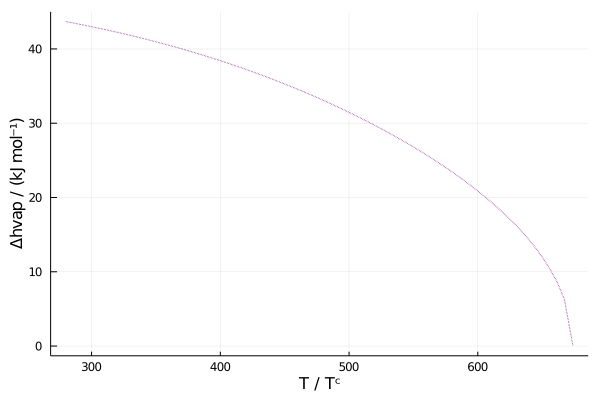

In [14]:
plt = plot(T_water, h_vap_water/1e3,color=:purple,linestyle=:dot,xlabel="T / Tᶜ",ylabel="Δhvap / (kJ mol⁻¹)", label = "")
display(plt)